In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [2]:
data = pd.read_csv("PM2.5_5003.csv")
print(data.head())
data.shape

         Date Slot No.  Alpha_Sensor    PMS_5003       Temp     RelHum
0  17-12-2021  SLOT-15     23.854833   57.193548  36.690000  25.828333
1  17-12-2021  SLOT-16     28.122333   65.440678  36.788333  28.433333
2  17-12-2021  SLOT-17     27.916610   63.218750  35.852542  29.930508
3  17-12-2021  SLOT-18     35.657000   84.762712  33.206667  39.593333
4  17-12-2021  SLOT-19     47.411500  108.661017  30.281667  46.045000


(1920, 6)

In [3]:
X = data[['PMS_5003', 'Temp', 'RelHum']]
Y = data['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = False)

data_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'PMS_5003': X_train["PMS_5003"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
data_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'PMS_5003': X_test["PMS_5003"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})

In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
data_test["MLR_Pred"] = lr_model.predict(X_test)

(array([1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

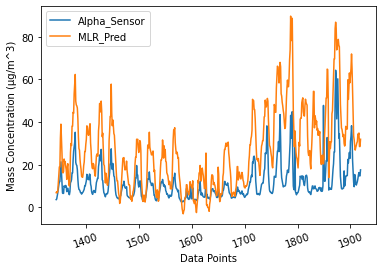

In [6]:
data_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

In [7]:
x = data["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = data_test["MLR_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)

Correlation_MLR_Pred:  0.8486270748855593


In [ ]:
#Get current axis
ax = plt.gca() 
  
# line plot for math marks
data.plot(kind = 'line',
        x = 'Time',
        y = 'PM1_alphasense',
        color = 'green',ax = ax)
  
# line plot for physics marks
data.plot(kind = 'line',x = 'Time',
        y = 'PMS',
        color = 'blue',ax = ax)
  
# line plot for chemistry marks
data.plot(kind = 'line',x = 'Time',
        y = 'Temp',
        color = 'black',ax = ax)

data.plot(kind = 'line',x = 'Time',
        y = 'RH',
        color = 'pink',ax = ax)
  
# set the title
plt.title('LinePlots')
plt.ylabel("Sensor")
  
# show the plot
plt.show()